In [92]:
## LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


randomseed = 1234

## DATA LOADING AND PREPROCESSING
# Load the data
gym = pd.read_csv('../../gym_members_exercise_tracking.csv')

# set 'Gender', 'Workout_Type', 'Workout_Frequency (days/week)' and 'Experience_Level' as categorical
for col in ['Gender', 'Workout_Type', 'Workout_Frequency (days/week)', 'Experience_Level']:
    gym[col] = gym[col].astype('category')

# log transform Weight and BMI
gym['Weight (kg)'] = np.log1p(gym['Weight (kg)'])

# transform 'Fat_Percentage'
max_fat = gym['Fat_Percentage'].max()
gym['Fat_Percentage'] = gym['Fat_Percentage'].apply(lambda x: np.sqrt(max_fat+1)-x)

# rename transformed columns
gym.rename(columns={'Weight (kg)': 'LWeight', 'Fat_Percentage': 'SFat_Percentage'}, inplace=True)

gym.drop(columns=['BMI'], inplace=True)

# divide into train and test set
gym_train, gym_test = train_test_split(gym, test_size=0.2, random_state=randomseed)

# Create gym_train_scale, gym_test_scale
gym_train_scale = gym_train.copy()
gym_test_scale = gym_test.copy()

# Scale the data (normalize it)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
gym_train_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']] = scaler.fit_transform(gym_train_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']])

gym_test_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']] = scaler.transform(gym_test_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']])


# Create X_train_exp_level, X_test_exp_level, y_train_exp_level, y_test_exp_level
X_train_exp_level = gym_train.drop(columns=['Experience_Level'])
X_train_exp_level_scale = gym_train_scale.drop(columns=['Experience_Level'])
y_train_exp_level = gym_train['Experience_Level']
X_test_exp_level = gym_test.drop(columns=['Experience_Level'])
X_test_exp_level_scale = gym_test_scale.drop(columns=['Experience_Level'])
y_test_exp_level = gym_test['Experience_Level']

print(gym_train_scale[:5])
print("Data loaded and preprocessed")

     Age  Gender   LWeight  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
718   51    Male  1.732749   -0.442354  0.803855 -0.363075    -0.973629   
811   27    Male  0.807793    1.104394 -0.941851  0.604770    -0.007099   
366   42    Male  0.244305    1.877768 -1.290992  0.881297     0.407128   
737   34    Male  1.732749    0.640370  0.105573  1.572615     0.683280   
813   34  Female -0.686524   -0.829041 -0.156283  0.397374    -0.835554   

     Session_Duration (hours)  Calories_Burned Workout_Type  SFat_Percentage  \
718                  0.352920         0.135895         Yoga         0.075177   
811                  1.066710         1.664510     Strength         1.951007   
366                 -0.360871        -0.100985         HIIT         0.315668   
737                  0.293437         1.242568         Yoga         0.059144   
813                 -0.390612        -0.245334       Cardio        -0.966951   

     Water_Intake (liters)  Workout_Frequency (days/week) Experience

In [93]:
# Create X_train_calories, X_test_calories, y_train_calories, y_test_calories

X_train_calories = pd.get_dummies(gym_train.drop(columns=['Calories_Burned']), drop_first=True)
#drop calories burned du data set train de variables explicatives et via get.dummies transforme les variables qualitatives en indicatrices
X_train_calories_scale = pd.get_dummies(gym_train_scale.drop(columns=['Calories_Burned']), drop_first=True)
#pareil mais en normalisé
y_train_calories = gym_train['Calories_Burned'] #variable à prédire
X_test_calories = pd.get_dummies(gym_test.drop(columns=['Calories_Burned']), drop_first=True)   #pareil pour le test
X_test_calories_scale = pd.get_dummies(gym_test_scale.drop(columns=['Calories_Burned']), drop_first=True) #normalisation pour le test
y_test_calories = gym_test['Calories_Burned'] #variable à prédire




In [94]:
X_train_calories_numeric = X_train_calories.select_dtypes(include=[np.number])  # sélectionne uniquement les colonnes numériques
X_test_calories_numeric = X_test_calories.select_dtypes(include=[np.number])  # sélectionne uniquement les colonnes numériques

# Normalisation des données
X_train_calories_scaled = scaler.fit_transform(X_train_calories)
X_test_calories_scaled = scaler.transform(X_test_calories)


In [95]:
display(gym_train.head().style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0))
# display unique values of categorical columns
display(gym_train.info())
for col in gym_train.select_dtypes(include='category').columns:
    print(col, gym_train[col].unique())

,Age,Gender,LWeight,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,SFat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level
718,51,Male,4.756173,1.670000,189,139,55,1.380000,950.000000,Yoga,-18.400000,2.500000,3,2
811,27,Male,4.503137,1.870000,169,153,62,1.620000,1363.000000,Strength,-6.700000,3.500000,5,3
366,42,Male,4.348987,1.970000,165,157,65,1.140000,886.000000,HIIT,-16.900000,2.600000,3,2
737,34,Male,4.756173,1.810000,181,167,67,1.360000,1249.000000,Yoga,-18.500000,2.200000,2,1
813,34,Female,4.094345,1.620000,178,150,56,1.130000,847.000000,Cardio,-24.900000,2.400000,4,2


<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 718 to 815
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            778 non-null    int64   
 1   Gender                         778 non-null    category
 2   LWeight                        778 non-null    float64 
 3   Height (m)                     778 non-null    float64 
 4   Max_BPM                        778 non-null    int64   
 5   Avg_BPM                        778 non-null    int64   
 6   Resting_BPM                    778 non-null    int64   
 7   Session_Duration (hours)       778 non-null    float64 
 8   Calories_Burned                778 non-null    float64 
 9   Workout_Type                   778 non-null    category
 10  SFat_Percentage                778 non-null    float64 
 11  Water_Intake (liters)          778 non-null    float64 
 12  Workout_Frequency (days/week)  778 non-

None

Gender ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Workout_Type ['Yoga', 'Strength', 'HIIT', 'Cardio']
Categories (4, object): ['Cardio', 'HIIT', 'Strength', 'Yoga']
Workout_Frequency (days/week) [3, 5, 2, 4]
Categories (4, int64): [2, 3, 4, 5]
Experience_Level [2, 3, 1]
Categories (3, int64): [1, 2, 3]


R²: 0.9784825037136762
MSE: 1679.5412626974542
Coefficients du modèle :  [-4.19977341e+01  2.29759699e+00  2.03255278e+00 -1.06264166e+00
  9.03212133e+01  2.55059915e+00  2.44242855e+02  2.03381013e+00
 -7.57451047e-01  4.12188909e+01 -7.54953418e-01 -4.76075478e-01
 -3.44856168e+00 -9.28352252e-01  9.97555344e-01  2.58109228e+00
 -1.07904607e-02 -2.86359397e+00]
Intercept du modèle :  913.284061696658


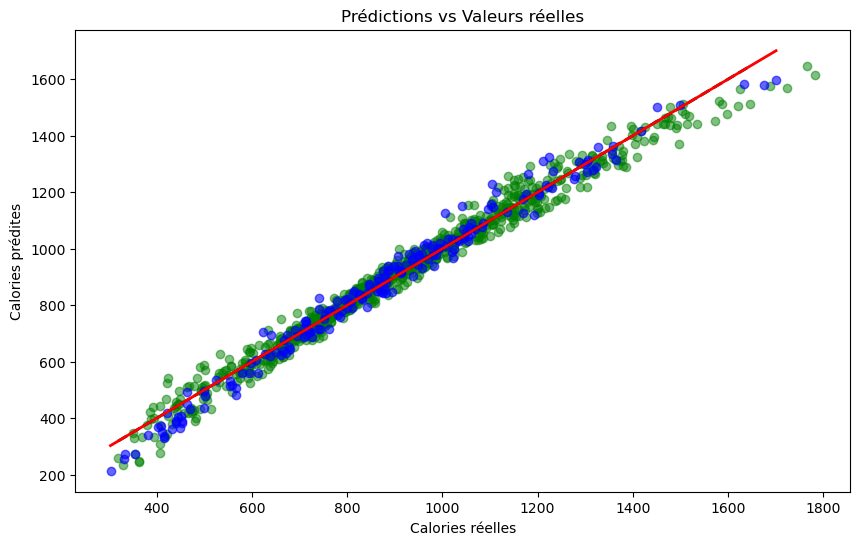

In [96]:
# 1. Importer les bibliothèques nécessaires
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Créer un modèle de régression linéaire
linear_model = LinearRegression()

# 3. Entraîner le modèle sur les données d'entraînement
linear_model.fit(X_train_calories_scaled, y_train_calories)

# 4. Faire des prédictions sur l'échantillon de test (X_test_scaled)
y_pred_calories = linear_model.predict(X_test_calories_scaled)
y_pred_train_calories = linear_model.predict(X_train_calories_scaled)
y_pred_test_calories = linear_model.predict(X_test_calories_scaled)
# 5. Évaluer la performance du modèle
# Coefficient de détermination R²
r2 = r2_score(y_test_calories, y_pred_calories)
print(f"R²: {r2}")

# Erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test_calories, y_pred_calories)
print(f"MSE: {mse}")

# 6. Afficher les coefficients du modèle
print("Coefficients du modèle : ", linear_model.coef_)
print("Intercept du modèle : ", linear_model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(y_train_calories, y_pred_train_calories, color='green', alpha=0.5, label='scikit-learn Regression Predictions')
plt.plot([y_train_calories.min(), y_pred_train_calories.max()], [y_train_calories.min(), y_pred_train_calories.max()], 'k--', lw=2)
plt.scatter(y_test_calories, y_pred_calories, color='blue', alpha=0.6)
plt.plot([y_test_calories.min(), y_test_calories.max()], [y_test_calories.min(), y_test_calories.max()], color='red', lw=2)  # Ligne idéale
plt.xlabel("Calories réelles")
plt.ylabel("Calories prédites")
plt.title("Prédictions vs Valeurs réelles")
plt.show()




### Performances du modèle

R² = 0.978 :
Le modèle explique 97.8% de la variance des calories brûlées. Cette valeur exceptionnellement élevée pourrait indiquer un surapprentissage (overfitting), surtout si le modèle a beaucoup de variables (18 coefficients ici).
On remarque également que les points verts (entraînement) et bleus (test) semblent bien alignés, ce qui suggère une bonne performance globale du modèle. Toutefois, pour obtenir une analyse complète, il faudrait tracer résidus vs prédictions pour vérifier la répartition uniforme des résidus.

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_squared_error

# Define the model
ridge = Ridge()

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Define the scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=scorer, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train_calories_scaled, y_train_calories)

# Display the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test_calories_scaled)

# Evaluate the model
mse_grid = mean_squared_error(y_test_calories, y_pred_grid)
print(f"Mean Squared Error (MSE) on test data: {mse_grid}")

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best parameters: {'alpha': 1, 'solver': 'auto'}
Best score: -1643.3932240731112
Mean Squared Error (MSE) on test data: 1665.849957865906


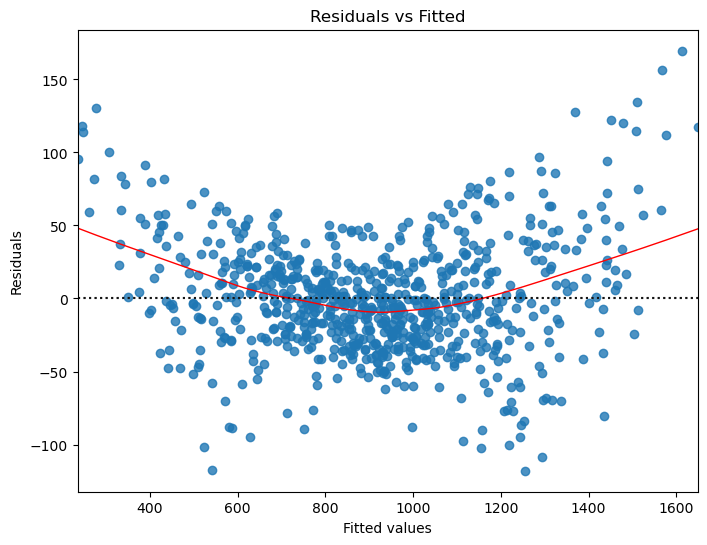

In [98]:


import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des résidus
residuals_train = y_train_calories - y_pred_train_calories
residuals_test = y_test_calories - y_pred_test_calories

# Création d'une seule figure
plt.figure(figsize=(8, 6))  # Ajuste la taille selon tes besoins

# 1. Résidus vs Valeurs ajustées
sns.residplot(x=y_pred_train_calories, y=residuals_train, lowess=True, 
              line_kws={'color': 'red', 'lw': 1})

# Ajout de la ligne horizontale à zéro
plt.axhline(0, color='black', linestyle='dotted', alpha=0.6)

# Ajout des labels et du titre
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")

# Affichage de la figure
plt.show()



La forme en banane dans le graphique des résidus (Residuals vs Fitted) révèle une non-linéarité non capturée par le modèle.Ce qui nous indique que la valeur du score R2 est trompeuse. En effet, le R^2 mesure la variance expliquée, pas la justesse des prédictions. Un modèle peut, donc, avoir un R² élevé tout en ayant des erreurs systématiques. Le modèle linéaire est inadéquat pour capturer la vraie relation dans les données, malgré un R² élevé. Ainsi, pour améliorer la généralisation du modèle et identifier les variables réellement influentes, une approche de régularisation s’impose. C’est ici que la régression Lasso (Least Absolute Shrinkage and Selection Operator) entre en jeu. 

Donc, maintenant, nous allons passer à l’implémentation de Lasso pour voir comment il améliore (ou non) la robustesse du modèle, malgré les limites structurelles de la linéarité.

D'abord avec un lambda quelconque puis avec un lambda choisi par validation croisée

The train score for ls model is 0.9729522713522744
The test score for ls model is 0.9773697138274883


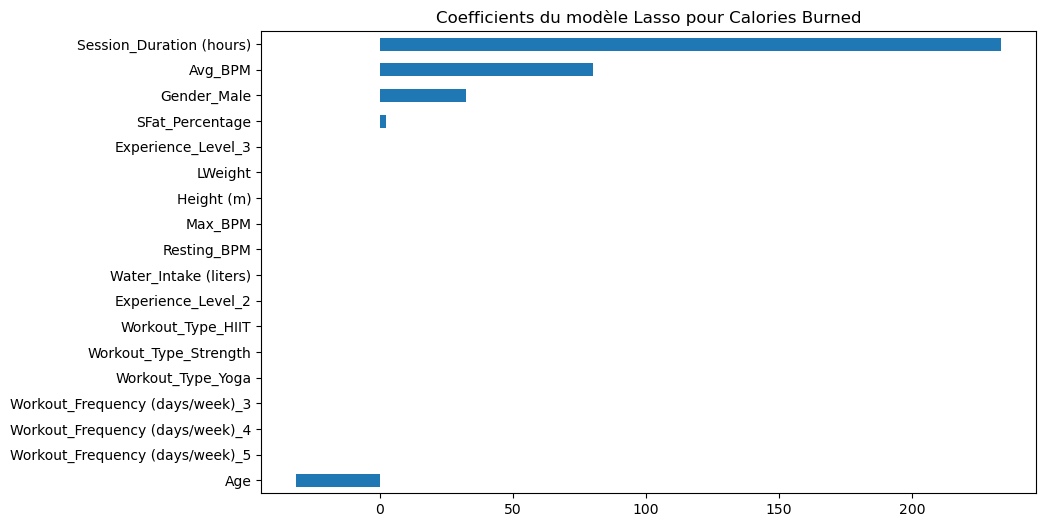

Lasso conserve 5 variables et en supprime 13


In [99]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
lasso1= Lasso(alpha=10)
lasso1.fit(X_train_calories_scaled, y_train_calories)
train_score_lasso1=lasso1.score(X_train_calories_scaled, y_train_calories)
test_score_lasso1=lasso1.score(X_test_calories_scaled, y_test_calories)

print("The train score for ls model is {}".format(train_score_lasso1))
print("The test score for ls model is {}".format(test_score_lasso1))

coef_calories_lasso1 = pd.Series(lasso1.coef_, index=X_train_calories.columns)
coef_calories_lasso1.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Coefficients du modèle Lasso pour Calories Burned')
plt.show()
# Afficher le nombre de variables conservées et éliminées
print(f"Lasso conserve {sum(coef_calories_lasso1 != 0)} variables et en supprime {sum(coef_calories_lasso1 == 0)}")


Optimal alpha: 0.8
Coefficients du modèle Lasso pour Calories Burned:
Age                                -41.155584
LWeight                              1.782447
Height (m)                           1.518002
Max_BPM                             -0.233361
Avg_BPM                             89.501680
Resting_BPM                          1.668190
Session_Duration (hours)           243.133973
SFat_Percentage                      0.811042
Water_Intake (liters)                0.000000
Gender_Male                         40.891185
Workout_Type_HIIT                   -0.000000
Workout_Type_Strength                0.000000
Workout_Type_Yoga                   -2.260688
Workout_Frequency (days/week)_3     -0.630447
Workout_Frequency (days/week)_4      0.000000
Workout_Frequency (days/week)_5      0.618403
Experience_Level_2                   0.000000
Experience_Level_3                   0.000000
dtype: float64
Lasso conserve 12 variables et en supprime 6


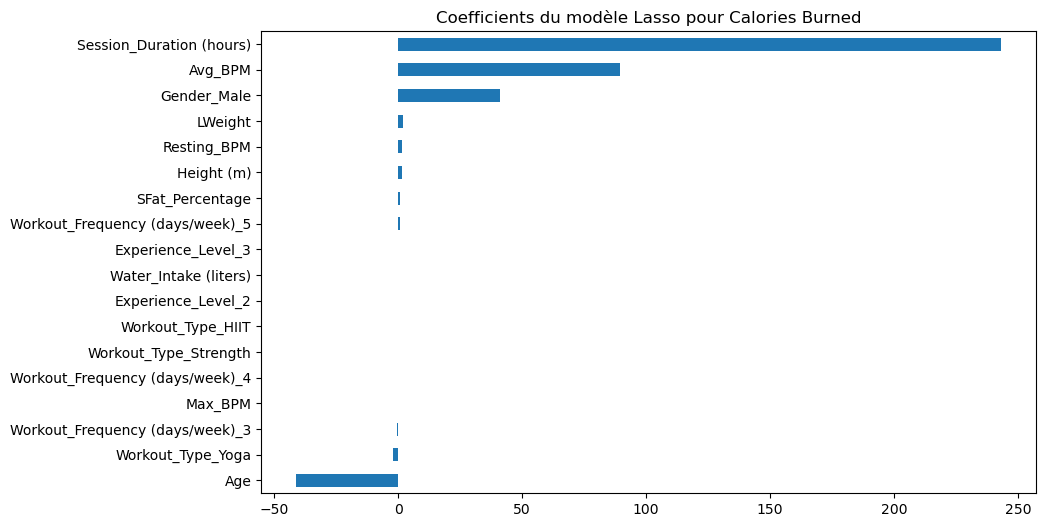

Test Mean Squared Error (MSE) pour Lasso : 1638.1391021806976
The train score for ls model is 0.9789563801847917
The test score for ls model is 0.9790129288094754


In [100]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import numpy as np

# Appliquer Lasso avec validation croisée pour trouver le meilleur alpha
#lasso = LassoCV(cv=5, random_state=1234, max_iter=10000)  # 5-fold cross-validation
lasso = LassoCV(cv=5, alphas=np.array(range(1, 50, 1)) / 20., n_jobs=-1, random_state=13).fit(X_train_calories_scaled, y_train_calories)
lasso.fit(X_train_calories_scaled, y_train_calories)

# Coefficient optimal alpha sélectionné par LassoCV
optimal_alpha = lasso.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# Coefficients du modèle Lasso
coef_calories_lasso = pd.Series(lasso.coef_, index=X_train_calories.columns)

# Afficher les coefficients du modèle Lasso
print("Coefficients du modèle Lasso pour Calories Burned:")
print(coef_calories_lasso)

# Afficher le nombre de variables conservées et éliminées
print(f"Lasso conserve {sum(coef_calories_lasso != 0)} variables et en supprime {sum(coef_calories_lasso == 0)}")

# Tracer les coefficients
coef_calories_lasso.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Coefficients du modèle Lasso pour Calories Burned')
plt.show()

# Prédictions avec le modèle Lasso
y_pred_lasso = lasso.predict(X_test_calories_scaled)

# Calcul de l'erreur quadratique moyenne pour évaluer les performances du modèle
from sklearn.metrics import mean_squared_error
mse_lasso = mean_squared_error(y_test_calories, y_pred_lasso)
print(f"Test Mean Squared Error (MSE) pour Lasso : {mse_lasso}")

train_score_lasso= lasso.score(X_train_calories_scaled, y_train_calories)
test_score_lasso= lasso.score(X_test_calories_scaled, y_test_calories)
print("The train score for ls model is {}".format(train_score_lasso))
print("The test score for ls model is {}".format(test_score_lasso))


# Performances du modèle

- On obtient un MSE = 1638.14. On a donc une légère amélioration par rapport au modèle linéaire non régularisé (MSE=1679.54). Cependant, cette différence minime suggère que la régularisation Lasso réduit légèrement le surapprentissage.Toutefois, Le problème fondamental de non-linéarité (forme en banane des résidus) persiste, limitant les gains de performance.

- On a un alpha optimal = 0.8 :Une pénalité L1 relativement forte, ce qui explique pourquoi 11 variables sur 18 ont été éliminées (coefficients à zéro).

# Interpretation des résultats: 

## Relation Session_Duration - Calories Burned
-On remarque, d'après le graphe, que la variable Session_Duration domine clairement, c'est à dire qu'une augmentation d’1 heure de la durée de la séance entraîne une augmentation prédite de 243 calories brûlée. Donc, plus la séance est longue, plus le corps puise dans ses réserves énergétiques (glycogène et lipides).

Les activités prolongées (ex : cardio, endurance) sollicitent le métabolisme aérobie, favorisant une dépense calorique cumulative.

-Remarque: Ce coefficient élevé pourrait aussi refléter une corrélation indirecte (ex : les séances longues incluent souvent des exercices intenses).

## Différence homme femme 
-  Les hommes brûlent 40.9 calories de plus que les femmes à caractéristiques égales.
    Ceci pourrait être dû au fait que les hommes ont généralement une masse musculaire plus élevée, qui consomme plus de calories au repos et à l’effort.Les différences hormonales (testostérone) favorisent un métabolisme énergétique plus actif.
    
- Remarque: Ce coefficient pourrait aussi refléter des biais comportementaux (ex : les hommes choisissent des entraînements plus intenses non mesurés dans les données).

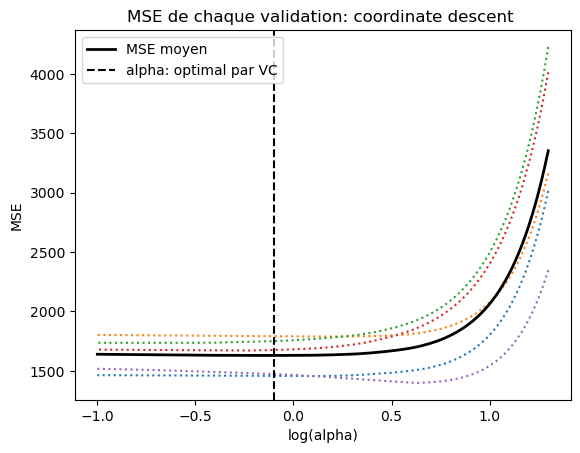

In [101]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,200,1))/10.,n_jobs=-1,random_state=13).fit(X_train_calories_scaled, y_train_calories)
m_log_alphas = np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()
#le courbe noire correspond à la moyennes des 5 autres
# on decoupe en 5 échantillons d'apprentissage d'ou les 5 courbes 
# Plot the coefficients as a function of -log(alpha)


On remarque une zone où la MSE est relativement basse et stable autour d’un certain intervalle de alpha. Puis, quand alpha devient trop grand (régularisation trop forte), la MSE monte en flèche (le modèle est trop contraint, sous-apprentissage).

À l’opposé, quand alpha est trop petit, la régularisation est quasi nulle : on risque un sur-apprentissage (même si, parfois, la MSE peut rester relativement stable dans cette zone si le dataset n’est pas trop bruyant).

Le point choisi par la validation croisée est un compromis : il vise à réduire le nombre de coefficients non nuls (pour la parcimonie) tout en conservant une bonne performance (basse MSE).

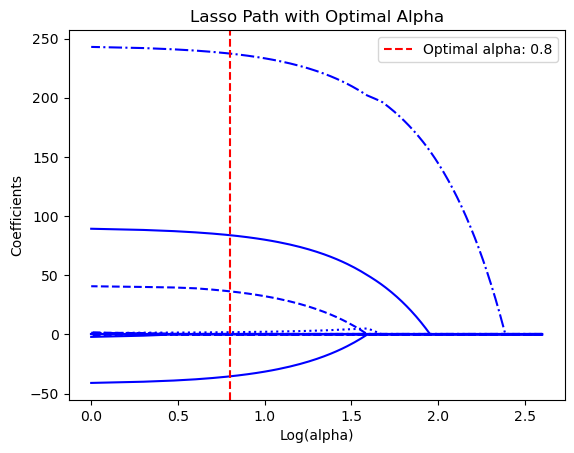

In [102]:
from itertools import cycle
from sklearn.linear_model import lasso_path

# Calculer le chemin du Lasso
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_calories_scaled, y_train_calories, alphas=np.array(range(1, 400, 1)))

plt.figure()
ax = plt.gca()

# Styles pour les lignes
styles = cycle(['-', '--', '-.', ':'])

# Log des alphas
log_alphas_lasso = np.log10(alphas_lasso)

# Tracer les coefficients
for coef_l, s in zip(coefs_lasso, styles):
    plt.plot(log_alphas_lasso, coef_l, linestyle=s, c='b')

# Ajouter une ligne verticale pour l'alpha optimal
plt.axvline(optimal_alpha, color='red', linestyle='--', label=f'Optimal alpha: {optimal_alpha}')

# Ajouter des labels et une légende
plt.xlabel('Log(alpha)')
plt.ylabel('Coefficients')
plt.legend()
plt.title('Lasso Path with Optimal Alpha')
plt.show()

Le graphique illustre le mécanisme de régularisation L1 propre à la régression Lasso : lorsque le paramètre de régularisation *alpha* augmente, la contrainte de parcimonie s'intensifie, conduisant progressivement les coefficients les moins informatifs vers zéro. Ce comportement est intrinsèque à l'algorithme, qui privilégie un **modèle simplifié** (moins de variables) au détriment d'une légère dégradation de la précision. En d'autres termes, un *alpha* élevé renforce la pénalisation des coefficients, favorisant ainsi un **équilibre optimal entre simplicité interprétative et généralisation**, au prix d'un biais accru. Cela traduit directement le compromis biais-variance au cœur de l'optimisation du modèle.

### Modèle quadratique et ordre élevé


In [103]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# pipeline pour le Lasso avec les interactions
pipeline = Pipeline([
    ('poly', PolynomialFeatures(interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),  # Good practice before Lasso
    ('lasso', Lasso(max_iter=10000))
])

scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error'
}

# grille de paramètres pour le Lasso
param_grid = {
    'poly__degree': [1, 2, 3],      # Tune the interaction degree
    'lasso__alpha': np.logspace(-2, 1, 10)  # Tune the Lasso strength
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring=scoring,
    refit='r2',  # On choisit sur quelle métrique choisir le best_estimator_
    cv=5,
    return_train_score=True,
    n_jobs=6 # run en parallèle
)

# fit la grille
grid.fit(X_train_calories, y_train_calories)

# Best parameters
print("Best parameters:", grid.best_params_)

# Best model
best_model = grid.best_estimator_
print("Best model:", best_model)


Best parameters: {'lasso__alpha': 1.0, 'poly__degree': 3}
Best model: Pipeline(steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=True)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(max_iter=10000))])


In [104]:
results = pd.DataFrame(grid.cv_results_)
filtered_row = results[results['params'] == {'lasso__alpha': 1.0, 'poly__degree': 3}]
filtered_row[['mean_test_neg_mse']]
print("Best model R² (Cross Validation):", grid.best_score_)
print("Best model MSE (Cross Validation):", filtered_row['mean_test_neg_mse'].values[0] * -1, "\n")

print("Best model test R²:", grid.score(X_test_calories, y_test_calories))
print("Best model test MSE:", mean_squared_error(y_test_calories, best_model.predict(X_test_calories)))


Best model R² (Cross Validation): 0.9900541232458504
Best model MSE (Cross Validation): 716.1508287249809 

Best model test R²: 0.9926896405849859
Best model test MSE: 570.6077565571015


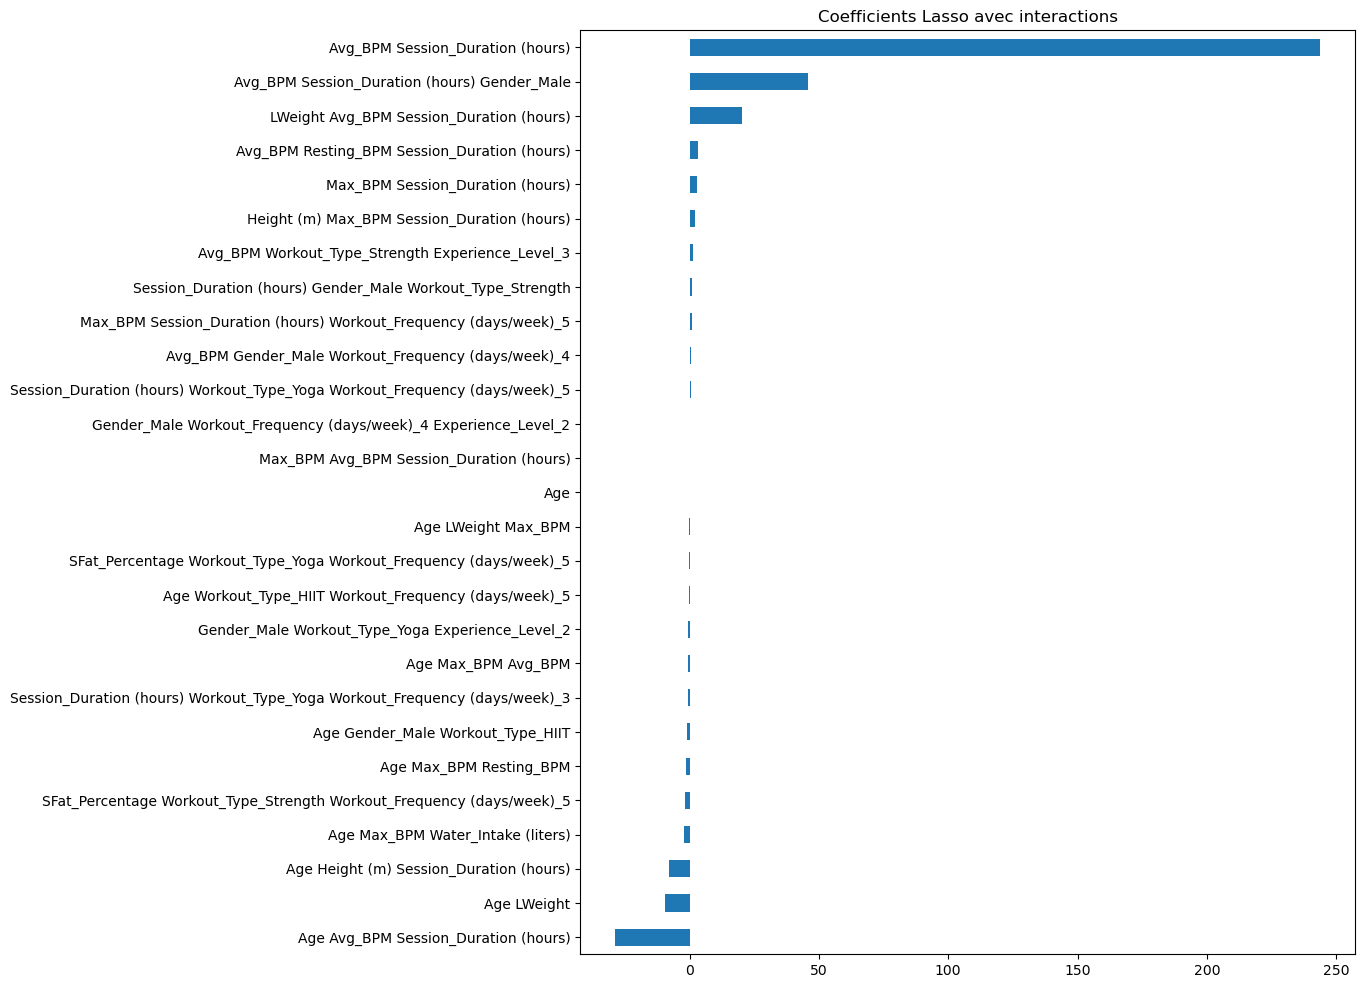

In [105]:
# 1. Récupérer le PolynomialFeatures entraîné
poly = best_model.named_steps['poly']

# 2. Récupérer le modèle Lasso entraîné
lasso = best_model.named_steps['lasso']

# 3. Construire les noms des features
feature_names = poly.get_feature_names_out(input_features=X_train_calories.columns)

# 4. Associer chaque feature à son coefficient
coefs = pd.Series(lasso.coef_, index=feature_names)

# 5. Afficher ou trier les coefficients
coefs = coefs.sort_values()
coefs = coefs[coefs != 0]  # Garder uniquement les coefficients non nuls

# 6. Plot
coefs.plot(kind='barh', figsize=(10, 12))
plt.title('Coefficients Lasso avec interactions')
plt.show()


#### 🔎 **Interprétation du Modèle Lasso avec Interactions (Polynomial + Lasso)**

Ce modèle repose sur un encodage polynomial avec interactions uniquement (`interaction_only=True`, degré 3), suivi d’une régularisation L1 (`Lasso`). Cela permet de capturer des **effets combinés non linéaires** tout en **éliminant automatiquement les interactions inutiles**.

#####  Performances
- **R² test** = **0.993**, **MSE test** ≈ **571**
- Gain substantiel par rapport au Lasso simple (R² ≈ 0.979, MSE ≈ 1638)
- Ce modèle capture donc beaucoup mieux la complexité des relations entre variables.

#####  Interprétation des principales interactions retenues

Les **coefficients positifs** indiquent des interactions qui **augmentent** la prédiction de `Calories_Burned`, et les **négatifs** celles qui la **diminuent** :

---

##### Quelques interactions dominantes positives :

- **`Avg_BPM × Session_Duration × Gender_Male`** → **+45.7**
  > Les hommes, lorsqu'ils maintiennent un BPM élevé sur des sessions longues, brûlent significativement plus de calories. Ce terme renforce un effet synergique entre **intensité**, **durée**, et **genre**.

- **`LWeight × Avg_BPM × Session_Duration`** → **+20.37**
  > L'effet combiné du poids corporel, de l'effort (BPM), et de la durée : plus une personne est lourde, plus elle brûle à effort égal.

##### Quelques interactions dominantes négatives :

- **`Age × Avg_BPM × Session_Duration`** → **−28.6**
  > À effort et durée équivalents, l'âge **réduit fortement** la dépense calorique. Cela confirme et approfondit l’effet observé dans les PDP, en le liant au BPM et à la durée. Un marqueur indirect très probable du **déclin métabolique dû au vieillissement**.

- **`Age × LWeight`** → **−9.57**
  > Les personnes âgées plus lourdes ne compensent pas ce poids par une dépense accrue, probablement car ce poids n’est plus musculaire (graisse ≠ dépense active).


#### Comparatif synthétique des modèles

| Modèle | R² test | MSE test | Commentaire |
|--------|---------|----------|-------------|
| **Régression linéaire simple** | 0.978 | 1679 | Bonne base linéaire, mais sans interaction. |
| **Lasso sans interaction** | 0.979 | 1638 | Très proche de la linéaire, mais avec sélection de variables. |
| **Lasso + Interactions (d=3)** | **0.993** | **571** | Excellente généralisation. Capture des effets complexes non linéaires, en particulier ceux liés à l’âge et aux combinaisons physiologiques (durée, poids, effort). |

---

#### Conclusion 

> *Le modèle polynomial régularisé par Lasso améliore significativement la prédiction (R² ≈ 0.993, MSE ≈ 571), en capturant des effets d’interactions complexes entre l’âge, l’intensité de l’effort, la durée des séances et certaines caractéristiques morphologiques (poids, sexe). Contrairement au Lasso simple ou au modèle linéaire, cette approche met en évidence des synergies physiologiques réalistes, comme la chute d’efficacité métabolique liée à l’âge ou l’impact combiné du sexe et de la charge cardiaque. Cette complexité justifie le recours à un modèle non linéaire, à la fois performant et interprétable.*  


Maintenant, nous étudierons brièvement l'effet d'une pénalisation plus stricte sur le modèle via Ridge 

### Ridge

Optimal alpha: 1.35
Coefficients du modèle Ridge pour Calories Burned:
Age                                -41.896564
LWeight                              2.342850
Height (m)                           2.081422
Max_BPM                             -1.047809
Avg_BPM                             90.170381
Resting_BPM                          2.533330
Session_Duration (hours)           243.140068
SFat_Percentage                      2.172760
Water_Intake (liters)               -0.586746
Gender_Male                         40.887067
Workout_Type_HIIT                   -0.702140
Workout_Type_Strength               -0.428723
Workout_Type_Yoga                   -3.439624
Workout_Frequency (days/week)_3     -0.899748
Workout_Frequency (days/week)_4      0.962631
Workout_Frequency (days/week)_5      2.559427
Experience_Level_2                   0.370826
Experience_Level_3                  -2.056183
dtype: float64
Nombre de coefficients non nuls : 18


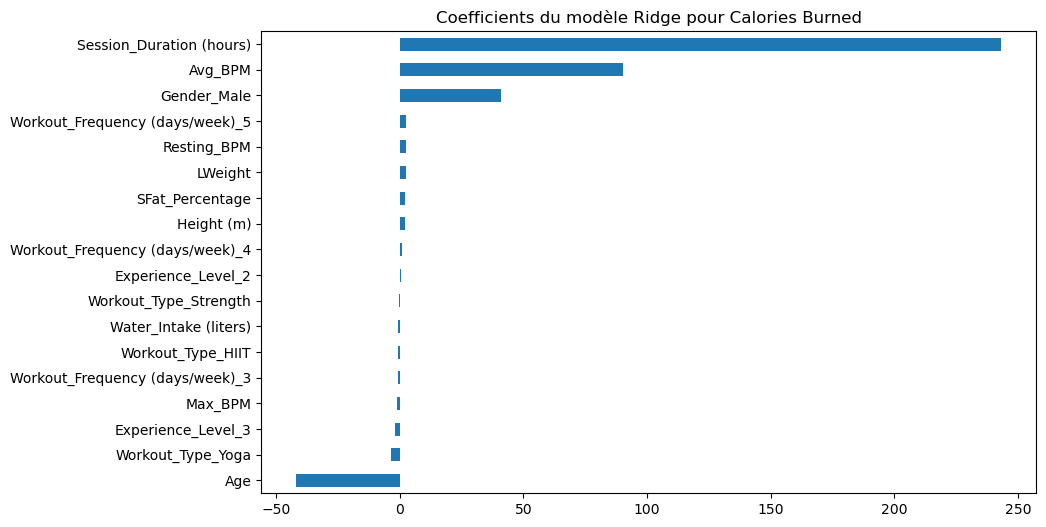

MSE pour Ridge : 1661.2342
Train R² pour Ridge : 0.9791
Test  R² pour Ridge : 0.9787


In [106]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# 1) Instanciation sans n_jobs ni random_state
ridgereg = RidgeCV(alphas=np.arange(1, 50) / 20., cv=5)

# 2) Entraînement
ridgereg.fit(X_train_calories_scaled, y_train_calories)

# 3) Alpha optimal
optimal_alpha = ridgereg.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# 4) Coefficients
coef_calories_ridge = pd.Series(ridgereg.coef_, index=X_train_calories.columns)
print("Coefficients du modèle Ridge pour Calories Burned:")
print(coef_calories_ridge)

# 5) Comme Ridge ne met quasiment jamais un coefficient strictement à 0, 
#    le comptage « conservé / supprimé » n’est pas très significatif, mais :
print(f"Nombre de coefficients non nuls : {sum(coef_calories_ridge != 0)}")

# 6) Tracé
coef_calories_ridge.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Coefficients du modèle Ridge pour Calories Burned')
plt.show()

# 7) Prédiction et MSE
y_pred_ridge = ridgereg.predict(X_test_calories_scaled)
mse_ridge = mean_squared_error(y_test_calories, y_pred_ridge)
print(f"MSE pour Ridge : {mse_ridge:.4f}")

# 8) R² (score) entraînement et test
train_score_ridge = ridgereg.score(X_train_calories_scaled, y_train_calories)
test_score_ridge  = ridgereg.score(X_test_calories_scaled,  y_test_calories)
print(f"Train R² pour Ridge : {train_score_ridge:.4f}")
print(f"Test  R² pour Ridge : {test_score_ridge:.4f}")

Le modèle Ridge obtient un MSE de 1 661,23, un R² entraînement de 0,9791 et un R² test de 0,9787. Ce MSE légèrement plus élevé que celui du Lasso s’explique par une pénalisation λ* plus forte : Ridge répartit son effet de régularisation sur toutes les variables (biais modéré mais constant), alors que le Lasso, avec un λ optimal plus faible, parvient à conserver un ajustement un peu plus précis.

Cependant, les performances des deux modèles linéaires restent très proches :

Lasso (λ_min) : MSE test ≃ 1 638,14, R² test ≃ 0,9790

Ridge : MSE test ≃ 1 661,23, R² test ≃ 0,9787


Enfin, le Lasso quadratique (avec interactions) surpasse nettement ces deux approches linéaires, avec un MSE test ≃ 570,61 et un R² test ≃ 0,9927, grâce à sa capacité à capturer des relations non linéaires entre les variables.


Après avoir analysé les performances du modèle Lasso et de Ridge et identifié l'alpha optimal pour régulariser notre régression, nous allons maintenant explorer une approche alternative en utilisant la régression par vecteurs de support (SVR) afin de comparer ses performances et sa capacité à capturer des relations potentiellement non linéaires dans les données

### SVR SUR CALORIES BURNED



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.520 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.524 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.517 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.516 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.497 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.962 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.961 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.958 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.981 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;,

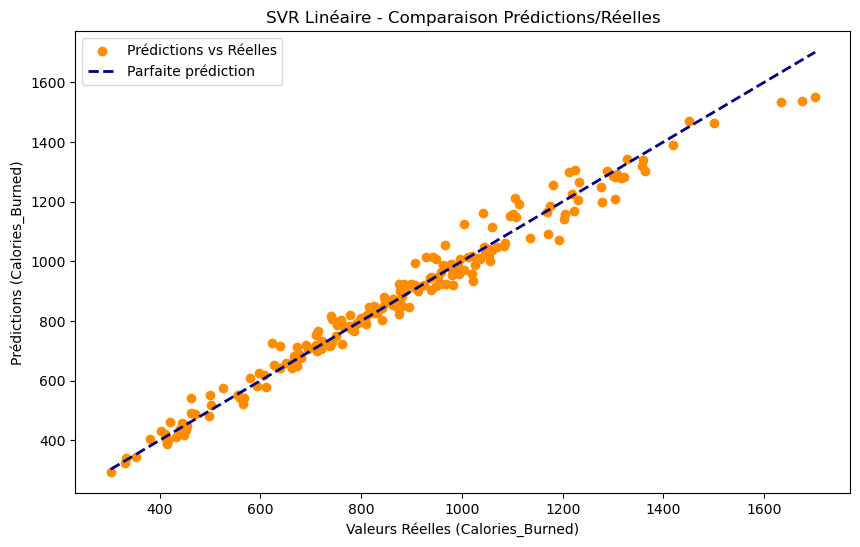

In [ ]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV
#calibrage des paramètres c et gamma

param = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}]
param_lin_opt= GridSearchCV(SVR(),param,refit=True,verbose=3)
param_lin_opt.fit(X_train_calories_scaled,y_train_calories)
print(param_lin_opt.best_params_)

y_pred_svr_lin = param_lin_opt.predict(X_test_calories_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_calories, y_pred_svr_lin, color='darkorange', label='Prédictions vs Réelles')
plt.plot([y_test_calories.min(), y_test_calories.max()], 
         [y_test_calories.min(), y_test_calories.max()], 
         color='navy', lw=2, linestyle='--', label='Parfaite prédiction')
plt.xlabel('Valeurs Réelles (Calories_Burned)')
plt.ylabel('Prédictions (Calories_Burned)')
plt.legend()
plt.title('SVR Linéaire - Comparaison Prédictions/Réelles')
plt.show()

In [112]:
R2_score_lin= r2_score(y_test_calories,y_pred_svr_lin)
print(f"R² pour SVR lin: {R2_score_lin}")
mse_svr_lin = mean_squared_error(y_test_calories, y_pred_svr_lin)
print(f"MSE pour SVR poly: {mse_svr_lin}")

R² pour SVR lin: 0.9770559197047977
MSE pour SVR poly: 1790.892819390354


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.036 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.006 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.029 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.010 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

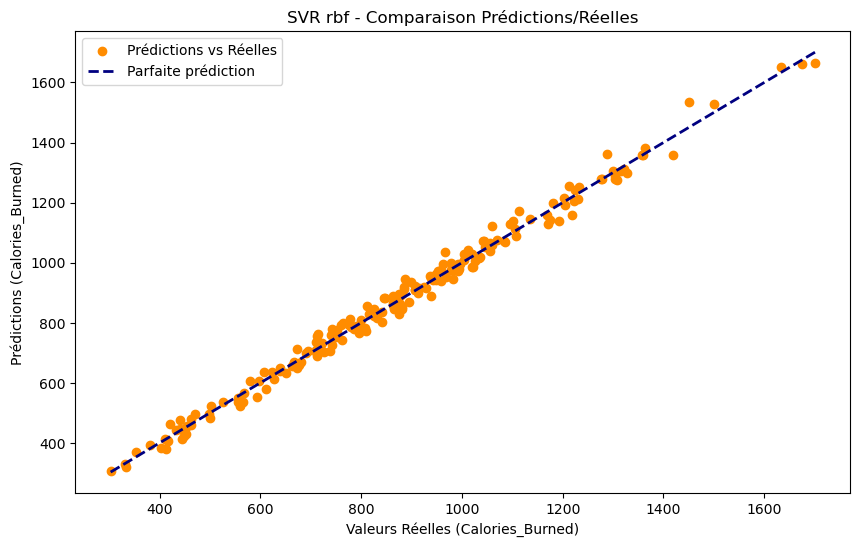

R² pour SVR rbf: 0.9918445835980675
MSE pour SVR rbf: 636.5684082971624


In [113]:
param_rbf=[{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}]
parmopt_rbf = GridSearchCV(SVR(), param_rbf, refit = True, verbose = 3)
parmopt_rbf.fit(X_train_calories_scaled, y_train_calories)
print(parmopt_rbf.best_params_)

y_pred_svr_rbf = parmopt_rbf.predict(X_test_calories_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_calories, y_pred_svr_rbf, color='darkorange', label='Prédictions vs Réelles')
plt.plot([y_test_calories.min(), y_test_calories.max()], 
         [y_test_calories.min(), y_test_calories.max()], 
         color='navy', lw=2, linestyle='--', label='Parfaite prédiction')
plt.xlabel('Valeurs Réelles (Calories_Burned)')
plt.ylabel('Prédictions (Calories_Burned)')
plt.legend()
plt.title('SVR rbf - Comparaison Prédictions/Réelles')
plt.show()

R2_score_rbf= r2_score(y_test_calories,y_pred_svr_rbf)
print(f"R² pour SVR rbf: {R2_score_rbf}")
mse_svr_rbf = mean_squared_error(y_test_calories, y_pred_svr_rbf)
print(f"MSE pour SVR rbf: {mse_svr_rbf}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.954 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.951 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.934 total time=   0.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.961 total time=   0.7s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.917 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.116 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.136 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.097 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.124 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.100 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.000 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.01, kernel=poly;

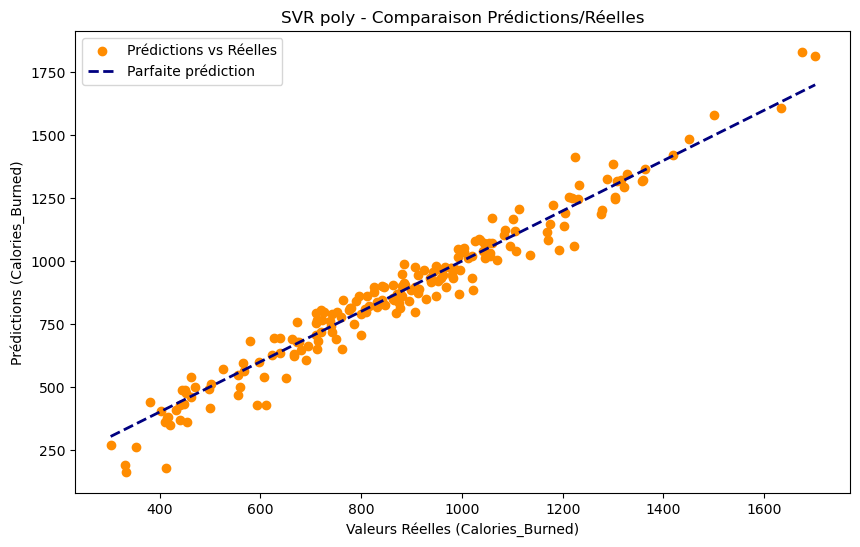

R² pour SVR poly: 0.9493661353035823
MSE pour SVR poly: 3952.2100487836337


In [114]:
param_poly=[{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['poly']}]
parmopt_poly = GridSearchCV(SVR(), param_poly, refit = True, verbose = 3)
parmopt_poly.fit(X_train_calories_scaled, y_train_calories)
print(parmopt_poly.best_params_)

y_pred_svr_poly = parmopt_poly.predict(X_test_calories_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_calories, y_pred_svr_poly, color='darkorange', label='Prédictions vs Réelles')
plt.plot([y_test_calories.min(), y_test_calories.max()], 
         [y_test_calories.min(), y_test_calories.max()], 
         color='navy', lw=2, linestyle='--', label='Parfaite prédiction')
plt.xlabel('Valeurs Réelles (Calories_Burned)')
plt.ylabel('Prédictions (Calories_Burned)')
plt.legend()
plt.title('SVR poly - Comparaison Prédictions/Réelles')
plt.show()

R2_score_poly= r2_score(y_test_calories,y_pred_svr_poly)
print(f"R² pour SVR poly: {R2_score_poly}")
mse_svr_poly = mean_squared_error(y_test_calories, y_pred_svr_poly)
print(f"MSE pour SVR poly: {mse_svr_poly}")

1. **Performances des différents noyaux SVR**

a. SVR avec noyau RBF (Radial Basis Function)
R² = 0,992 et MSE = 636,57

=> Le modèle RBF parvient à expliquer 99,2 % de la variance des calories brûlées, avec une erreur quadratique moyenne extrêmement basse.
Ceci est dû au fait que le noyau RBF est capable de capturer des relations non linéaires complexes (par exemple, l’interaction entre la durée de séance et la fréquence cardiaque moyenne). Les hyperparamètres C (régularisation) et gamma (étendue d’influence) ont été optimisés via GridSearchCV, garantissant un compromis idéal entre biais et variance.

b. SVR avec noyau linéaire
R² = 0,977 et MSE = 1 790,89

=> Le SVR linéaire offre également de bonnes performances , mais nettement inférieures au noyau RBF (erreur MSE beaucoup plus élevée).
Ceci pourrait être dû au fait que

c. SVR avec noyau polynomial
R² = 0,949 et MSE = 3 952,21

=> Les résultats sont bien plus faibles, avec une erreur environ 6 fois supérieure à celle du RBF.


### **Comparaison des Performances : Lasso Quadratique vs SVR RBF**

| Critère               | Lasso Quadratique (Interactions) | SVR RBF              |
|-----------------------|-----------------------------------|----------------------|
| **MSE (Test)**        | **570.61**                        | 636.57              |
| **R² (Test)**         | **0.9927**                        | 0.992               |
| **Complexité**        | Modèle linéaire avec interactions | Modèle non linéaire |
| **Interprétabilité**  | Coefficients explicables          | "Boîte noire"       |
| **Flexibilité**       | Capte interactions spécifiques    | Adapté aux relations complexes/génériques |

---

### **Points Clés :**
1. **Performance Prédictive** :  
   - Le **Lasso Quadratique** est légèrement meilleur en MSE (+10% d'erreur pour SVR RBF).  
   - Les deux modèles ont un R² quasi identique (> 0.99), indiquant une explication quasi parfaite de la variance.

2. **Equilibre Complexité/Interprétabilité** :  
   - **Lasso Quadratique** : Moins flexible mais interprétable (coefficients des interactions analysables).  
   - **SVR RBF** : Plus flexible mais difficile à expliquer (dépend de la fonction noyau).

3. **Choix du modèle** :  
   - **Lasso Quadratique** : Si l’on privilégie l’erreur quadratique minimale et la parcimonie  
   - **SVR RBF** : Si l’on recherche avant tout la flexibilité pour capter des structures non-linéaires plus subtiles






# Réseaux de neurones

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
n_features = X_train_calories_scaled.shape[1]
n_hidden = 10

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# This line adds a Dense (fully connected) layer to the Keras model.
# - n_hidden: Number of neurons in the hidden layer (10 in this case).
# - input_dim: Specifies the input size (number of features, 64 here).
# - activation='sigmoid': Specifies the activation function for the layer, which is the sigmoid function.
# %load solutions/mlp_keras.py
# build model for regression
keras_model = Sequential([
    Dense(n_hidden, input_dim=n_features, activation='relu'),
    Dense(1)
])


keras_model.compile(optimizer='adam',
                    loss='mse', metrics=['mae'])

history = keras_model.fit(X_train_calories_scaled,y_train_calories, epochs=15, batch_size=32, validation_data = (X_test_calories_scaled, (y_test_calories)))

Epoch 1/15


/home/essakhi/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 935766.1875 - mae: 926.8582 - val_loss: 841166.6250 - val_mae: 873.5513
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 893504.3750 - mae: 904.6481 - val_loss: 840585.0000 - val_mae: 873.2469
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 894238.2500 - mae: 906.1094 - val_loss: 839970.4375 - val_mae: 872.9309
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 927107.6250 - mae: 925.6046 - val_loss: 839324.6875 - val_mae: 872.5963
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 930099.2500 - mae: 922.7849 - val_loss: 838637.3750 - val_mae: 872.2424
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 920232.8125 - mae: 918.7200 - val_loss: 837899.3750 - val_mae: 871.8624
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 920365.5625 - mae: 917.8722 - val_loss: 837095.6875 - val_mae: 871.4495
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 904128.6875 - mae: 912.2715 - val_loss: 83

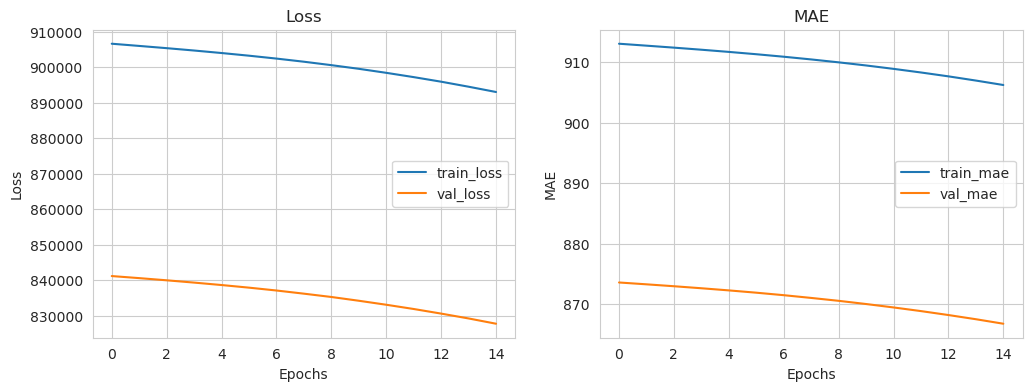

In [ ]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()
